In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data set
athletes = pd.read_csv('athlete_events.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
regions = pd.read_csv('noc_regions.csv')

In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# merge both dataframes
athletes_df = athletes.merge(regions, how='left', on='NOC')
athletes_df[['Name', 'NOC', 'region', 'notes']].head()

,Name,NOC,region,notes
0,A Dijiang,CHN,China,NaN
1,A Lamusi,CHN,China,NaN
2,Gunnar Nielsen Aaby,DEN,Denmark,NaN
3,Edgar Lindenau Aabye,DEN,Denmark,NaN
4,Christine Jacoba Aaftink,NED,Netherlands,NaN


In [9]:
athletes_df.notes.value_counts()

Yugoslavia                     2583
Hong Kong                       685
Trinidad and Tobago             375
Serbia and Montenegro           321
Virgin Islands                  294
Bohemia                         153
Antigua and Barbuda             133
United Arab Republic            123
Individual Olympic Athletes      94
Australasia                      86
Netherlands Antilles             79
Turks and Caicos Islands         42
West Indies Federation           20
Refugee Olympic Team             12
Crete                            11
North Yemen                      11
Tuvalu                            7
South Yemen                       5
Unknown                           2
North Borneo                      2
Newfoundland                      1
Name: notes, dtype: int64

In [10]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [11]:
athletes_df.rename(columns={'region': 'Region', 'notes' : 'Notes'}, inplace=True)

In [14]:
athletes_df.iloc[:,-2:].head()

,Region,Notes
0,China,NaN
1,China,NaN
2,Denmark,NaN
3,Denmark,NaN
4,Netherlands,NaN


In [15]:
 athletes_df.shape

(271116, 17)

In [16]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [17]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [18]:
nan_values = athletes_df.isna().any()
nan_values

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [19]:
# Find count of null values in each columns
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [20]:
# print the column names containing null values or missing values in the form of list 
[col for col in athletes_df.columns if athletes_df[col].isnull().any()]

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [32]:
athletes_df[athletes_df['Age'].isna()][['Name', 'Age']].head()

,Name,Age
147,Mohamed Jamshid Abadi,NaN
152,Georgi Abadzhiev,NaN
153,Georgi Abadzhiev,NaN
162,Mohamed Abakkar,NaN
212,Sayed Fahmy Abaza,NaN


In [33]:
athletes_df.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [34]:
athletes_df[athletes_df['Team'] == 'India'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [35]:
athletes_df.query('Team == "Japan"')[['Name', 'Sex', 'Age', 'Team']].head()

,Name,Sex,Age,Team
625,Isao Ko Abe,M,24.0,Japan
629,Kazumi Abe,M,28.0,Japan
630,Kazuo Abe,M,25.0,Japan
631,Kinya Abe,M,23.0,Japan
632,Kiyoshi Abe,M,25.0,Japan


In [36]:
# Top Countries participating 
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)

In [37]:
athletes_df['Team'].value_counts().sort_values(ascending=False).head(10)

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

In [38]:
top_10_countries.index

Index(['United States', 'France', 'Great Britain', 'Italy', 'Germany',
       'Canada', 'Japan', 'Sweden', 'Australia', 'Hungary'],
      dtype='object')

In [44]:
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Over all participation by country'}, ylabel='Team'>

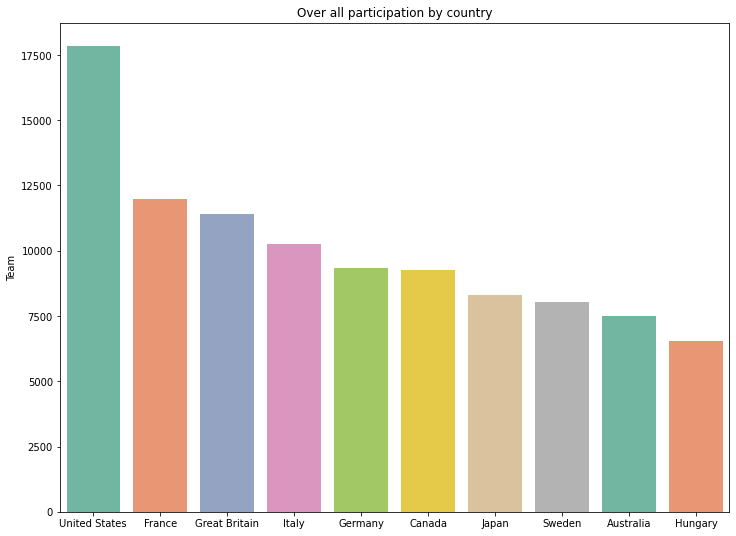

In [39]:
# plot the top 10 countries
plt.figure(figsize=(12, 9))

plt.title('Over all participation by country')

sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')

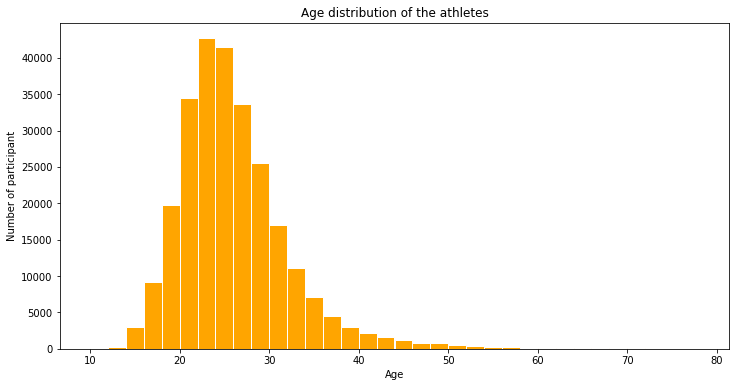

In [46]:
# Age distribution of the participant
plt.figure(figsize=(12, 6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participant')
plt.hist(athletes_df.Age, bins=np.arange(10, 80, 2), color='orange', edgecolor='white');
# np.arange(10, 80, 2) means range from 10-80 with the gap of 2

In [47]:
athletes_df['Age'].value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
96.0        1
97.0        1
10.0        1
Name: Age, Length: 74, dtype: int64

In [49]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [57]:
# To find the season unique values but have to check 
winter_sport = athletes_df[athletes_df['Season'] == 'Winter'].Sport.unique()

In [58]:
summer_sport = athletes_df[athletes_df['Season'] == 'Summer'].Sport.unique()

In [60]:
# Male and female participant 
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

In [63]:
athletes_df['Name'].str.len().value_counts()

13     19523
14     18600
12     18126
15     16144
11     14185
       ...  
79         1
82         1
88         1
97         1
108        1
Name: Name, Length: 80, dtype: int64

([<matplotlib.patches.Wedge at 0x174f94b85c8>,
 [Text(0.7147310163003329, -0.8361576252945934, 'M'),
  Text(-0.7147309380136028, 0.836157692212537, 'F')],
 [Text(0.38985328161836336, -0.4560859774334145, '72.5%'),
  Text(-0.3898532389165105, 0.456086013934111, '27.5%')])

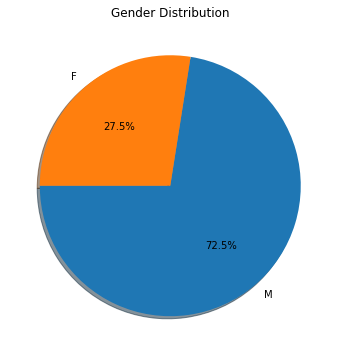

In [65]:
# pie chart for male and female athlete

plt.figure(figsize=(12, 6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, shadow=True)

In [68]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [70]:
athletes_df.iloc[0]

ID                                  1
Name                        A Dijiang
Sex                                 M
Age                              24.0
Height                          180.0
Weight                           80.0
Team                            China
NOC                               CHN
Games                     1992 Summer
Year                             1992
Season                         Summer
City                        Barcelona
Sport                      Basketball
Event     Basketball Men's Basketball
Medal                             NaN
Region                          China
Notes                             NaN
Name: 0, dtype: object

In [71]:
# Total Medals 
athletes_df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [79]:
athletes_df[['Team', 'Medal']].head()

,Team,Medal
0,China,NaN
1,China,NaN
2,Denmark,NaN
3,Denmark/Sweden,Gold
4,Netherlands,NaN


In [87]:
athletes_df['Team'].value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Whitini Star         1
Brentina             1
Hannover             1
Turquoise-1          1
Cinara-13            1
Name: Team, Length: 1184, dtype: int64

In [88]:
# To get a specific country medal list
athletes_df[
    athletes_df['Team'] == 'China'
].Medal.value_counts()

Silver    325
Gold      308
Bronze    268
Name: Medal, dtype: int64

In [118]:
# Total number of female athlete in each olympics
female_participant = athletes_df[
            (athletes_df['Sex'] == 'F') & 
            (athletes_df['Season'] == 'Summer')
        ][['Sex', 'Year']]

In [122]:
 female_participant = female_participant.groupby('Year').count().reset_index()
female_participant.tail()

,Year,Sex
23,2000,1
24,2004,1
25,2008,1
26,2012,1
27,2016,1


In [107]:
athletes_df['Sex'].map({'M': 'Male', 'F' : 'Female'})

0           Male
1           Male
2           Male
3           Male
4         Female
           ...  
271111      Male
271112      Male
271113      Male
271114      Male
271115      Male
Name: Sex, Length: 271116, dtype: object

In [109]:
athletes_df[athletes_df['Sex'] == 'F'][['Team', 'Sex', 'Season', 'Year']]

,Team,Sex,Season,Year
4,Netherlands,F,Winter,1988
5,Netherlands,F,Winter,1988
6,Netherlands,F,Winter,1992
7,Netherlands,F,Winter,1992
8,Netherlands,F,Winter,1994
...,...,...,...,...
271080,Soviet Union,F,Summer,1964
271099,Greece,F,Summer,2004
271102,Russia,F,Summer,2000
271103,Russia,F,Summer,2004


In [127]:
women_olympics = athletes_df[
            (athletes_df['Sex'] == 'F') & 
            (athletes_df['Season'] == 'Summer')
        ]

Text(0.5, 1.0, 'Women Participation')

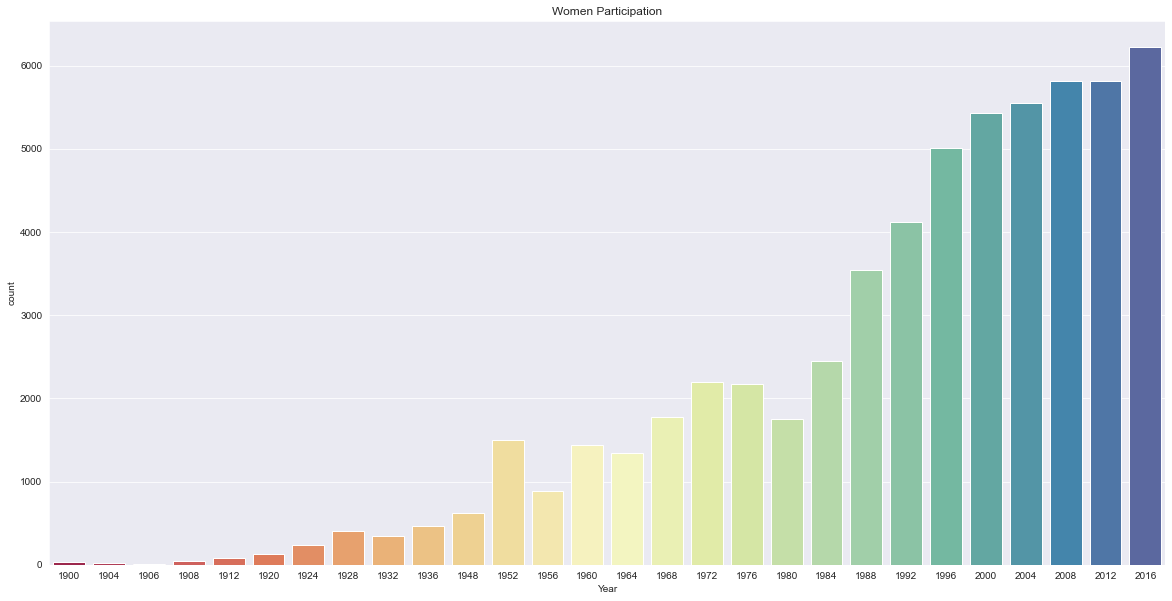

In [138]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women_olympics, palette="Spectral")
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes Over time')

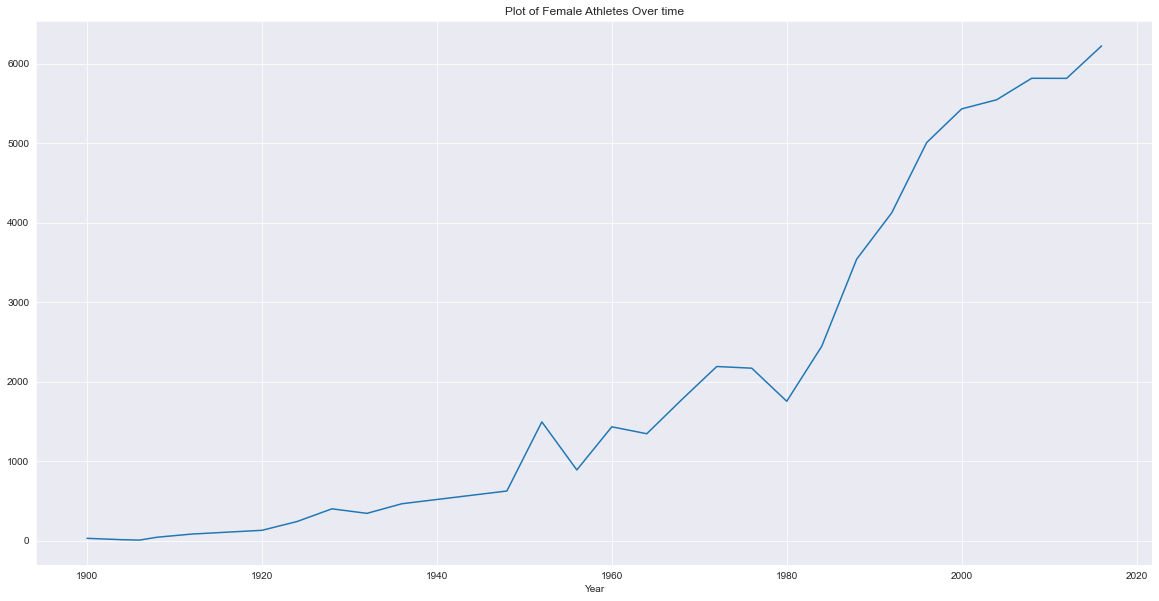

In [135]:
# Line Graph for women atheletes in olympic
part = women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:, 'F'].plot()
plt.title('Plot of Female Athletes Over time')

In [145]:
# Gold Medal athletes
gold_medals = athletes_df[(athletes_df.Medal == 'Gold')]
gold_medals.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN


In [146]:
# take only the value that are different from Nan
gold_medals =gold_medals[np.isfinite(gold_medals['Age'])]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [147]:
# gold beyond 60 
gold_medals['ID'][gold_medals['Age'] > 60].count()

6

In [155]:
# which sport come in gold above 60 
# sporting_event = gold_medals[['Sport', 'Team']][gold_medals['Age'] > 60]
sporting_event = gold_medals['Sport'][gold_medals['Age'] > 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for athletes over 60 ')

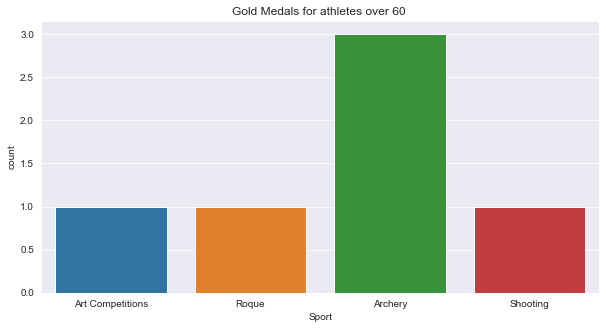

In [156]:
# plot the sporting_event

plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for athletes over 60 ')

In [157]:
# this is comment
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [158]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [160]:
athletes_df.pivot_table(columns=["Team","Medal"], values="ID")

Team  A North American Team Afghanistan   Algeria                     \
Medal                Bronze      Bronze    Bronze     Gold    Silver   
ID                 57763.75     86313.0  66685.75  72313.4  65542.75   

Team  Ali-Baba II Amateur Athletic Association Amstel Amsterdam   Ancora  \
Medal      Bronze                         Gold           Bronze     Gold   
ID        55547.4                      87707.2          54991.5  89730.5   

Team       Angelita  ... Winnipeg Shamrocks-1    Yugoslavia                \
Medal          Gold  ...                 Gold        Bronze          Gold   
ID     50523.583333  ...              37038.5  76406.860215  73657.430769   

Team                  Zambia          Zimbabwe                         \
Medal        Silver   Bronze   Silver   Bronze          Gold   Silver   
ID     73274.532934  83841.0  76386.0  23549.0  61432.941176  23549.0   

Team            Zut  
Medal        Silver  
ID     77299.666667  

[1 rows x 783 columns]

<AxesSubplot:xlabel='Team,Medal'>

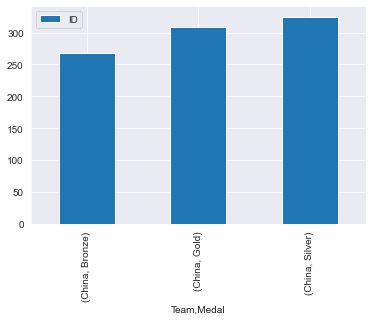

In [170]:
athletes_df[
    athletes_df.Team == "China"
].pivot_table(index=["Team","Medal"], values="ID", aggfunc="count").plot(kind="bar", stacked=True)